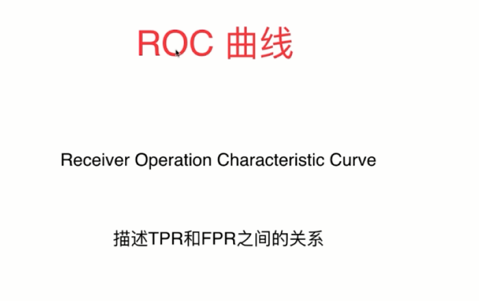

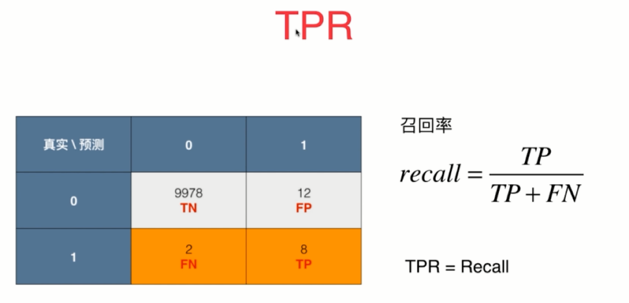

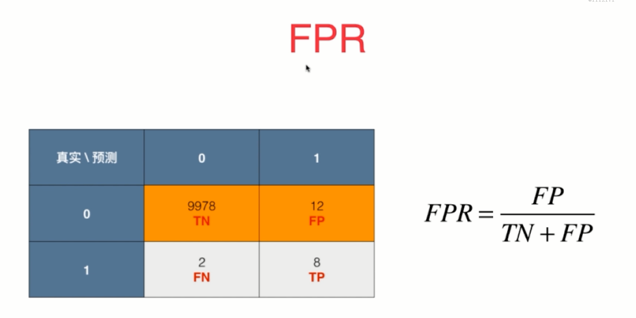

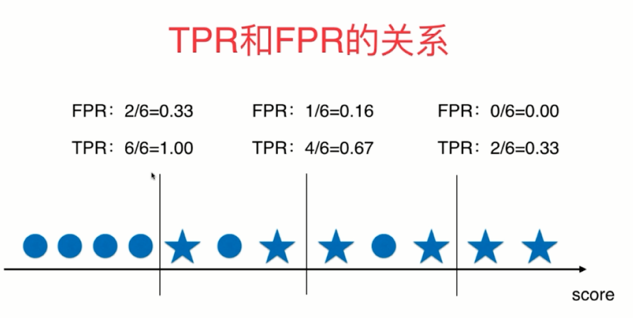

随着阈值的增大，FPR和TPR都会逐渐降低

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))


def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))


def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))


def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))


def TPR(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.


def FPR(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.

In [24]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype="int")
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

# 绘制ROC曲线

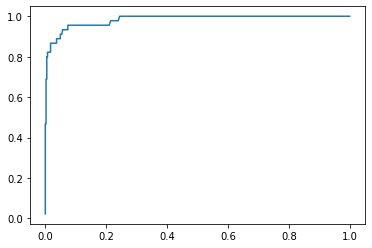

In [28]:
plt.plot(fprs, tprs)
plt.show()

# scikit-learn中的ROC曲线

In [29]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

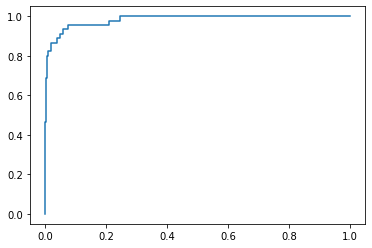

In [30]:
plt.plot(fprs, tprs)
plt.show()

roc曲线的面积可以作为衡量分类算法的一个指标，面积越大，说明分类算法越好

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

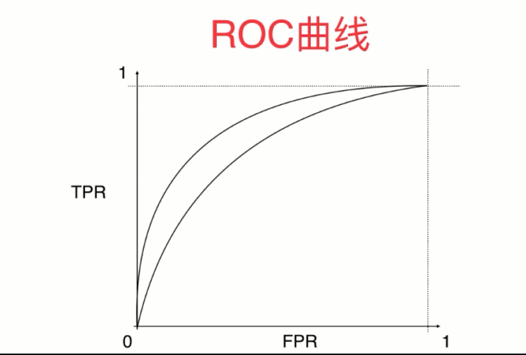

ROC曲线主要用于比较两个模型的优越程度